--- Dataset Summary ---
pillar       ACCESS  AFFORDABILITY  ENABLER  GENDER  USAGE
record_type                                               
impact_link       1              0        0       0      1
observation      15              1        1       4     11
target            2              0        0       1      0


C:\Users\hp\AppData\Local\Temp\ipykernel_16720\1829151762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='confidence', palette='viridis')


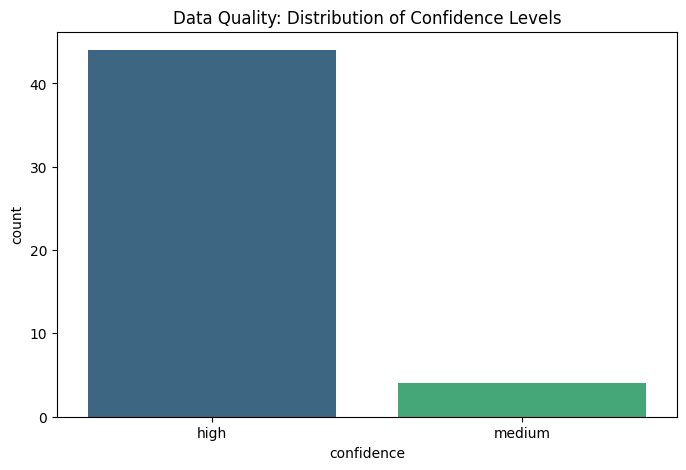

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your enriched data
df = pd.read_csv('../data/processed/ethiopia_fi_processed_data.csv')

# 1. Summarize the Dataset
print("--- Dataset Summary ---")
summary = df.groupby(['record_type', 'pillar']).size().unstack(fill_value=0)
print(summary)

# 2. Check Data Quality (Confidence Levels)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='confidence', palette='viridis')
plt.title('Data Quality: Distribution of Confidence Levels')
plt.show()

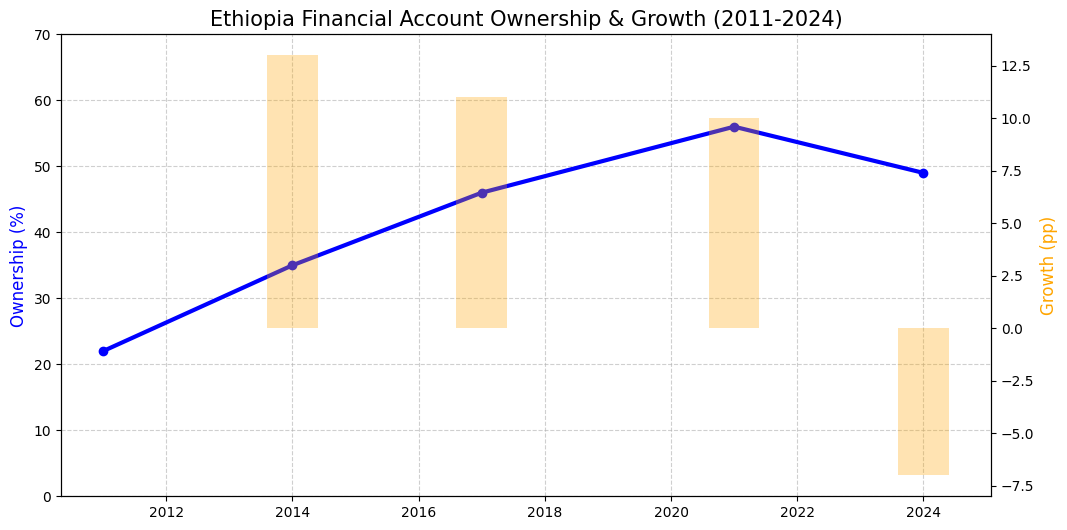

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Historical Data (from Findex)
findex_data = {
    'Year': [2011, 2014, 2017, 2021, 2024],
    'Ownership': [22.0, 35.0, 46.0, 56.0, 49.0] # Based on your REC data
}
df_findex = pd.DataFrame(findex_data)

# 2. Calculate Growth Rate (%)
df_findex['Growth'] = df_findex['Ownership'].diff()

# 3. Create the Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the ownership rate
ax1.plot(df_findex['Year'], df_findex['Ownership'], marker='o', color='b', linewidth=3, label='Account Ownership (%)')
ax1.set_ylabel('Ownership (%)', color='b', fontsize=12)
ax1.set_ylim(0, 70)

# Add bars for the growth increase
ax2 = ax1.twinx()
ax2.bar(df_findex['Year'], df_findex['Growth'], alpha=0.3, color='orange', label='Growth (percentage points)')
ax2.set_ylabel('Growth (pp)', color='orange', fontsize=12)

plt.title('Ethiopia Financial Account Ownership & Growth (2011-2024)', fontsize=15)
ax1.grid(True, linestyle='--', alpha=0.6)
plt.show()

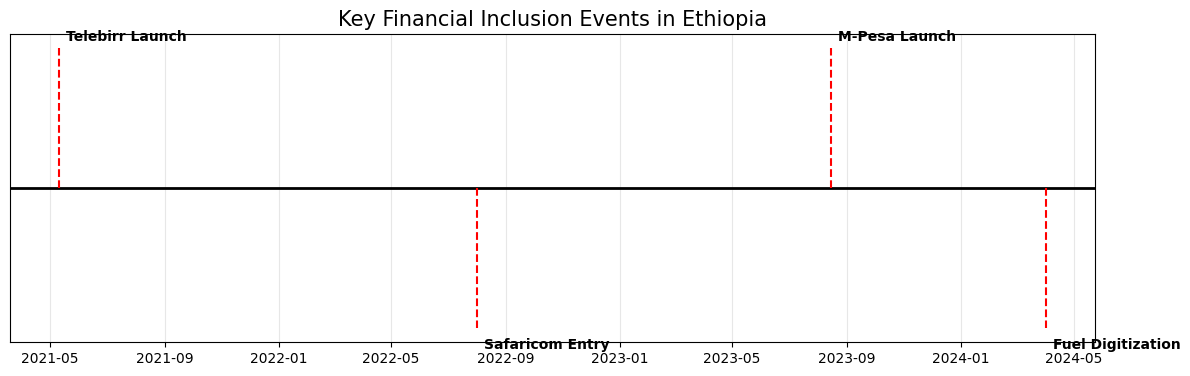

In [3]:
# 1. Define your events
events = {
    '2021-05-11': 'Telebirr Launch',
    '2022-08-01': 'Safaricom Entry',
    '2023-08-15': 'M-Pesa Launch',
    '2024-04-01': 'Fuel Digitization'
}

# 2. Create the timeline
plt.figure(figsize=(14, 4))
plt.axhline(0, color="black", linewidth=2) # The baseline

# Plot each event as a "stem"
for i, (date, event) in enumerate(events.items()):
    dt = pd.to_datetime(date)
    level = 1 if i % 2 == 0 else -1 # Alternate labels top/bottom
    plt.vlines(dt, 0, level, color="red", linestyle="--")
    plt.annotate(event, xy=(dt, level), xytext=(5, 5 if level > 0 else -15),
                 textcoords="offset points", fontweight='bold')

plt.title('Key Financial Inclusion Events in Ethiopia', fontsize=15)
plt.yticks([]) # Hide y-axis
plt.grid(axis='x', alpha=0.3)
plt.show()

In [4]:
import sys
sys.path.append('../src') # Tell Python where to find utils.py
from utils import load_data, plot_indicator_trend

# Load data with a single line
df = load_data('../data/processed/ethiopia_fi_processed_data.csv')

✅ Successfully loaded data from ../data/processed/ethiopia_fi_processed_data.csv


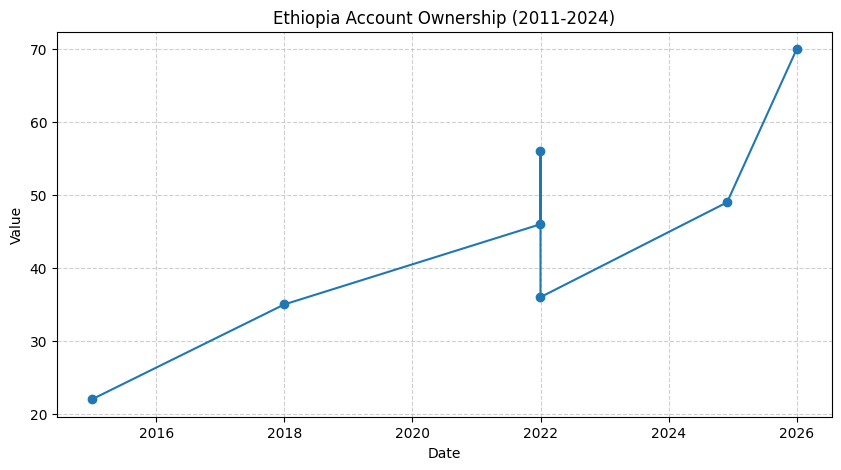

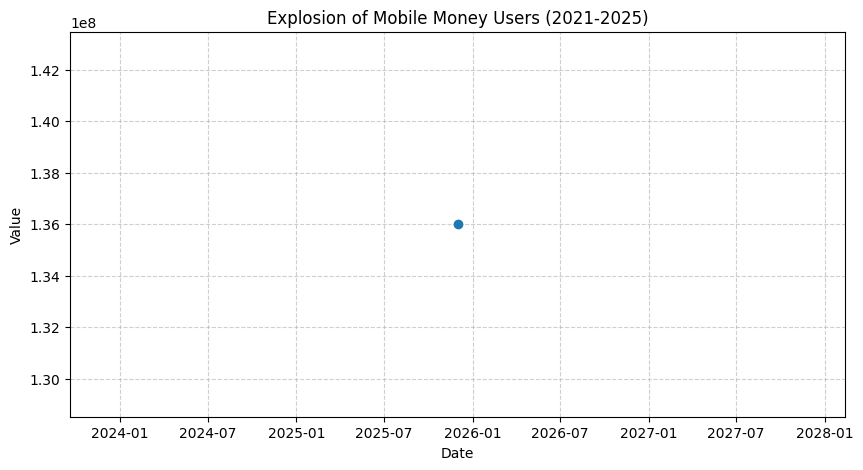

In [5]:
# Plot Account Ownership
plot_indicator_trend(df, "Account Ownership Rate", "Ethiopia Account Ownership (2011-2024)")

# Plot Mobile Money
plot_indicator_trend(df, "Mobile Money Accounts", "Explosion of Mobile Money Users (2021-2025)")

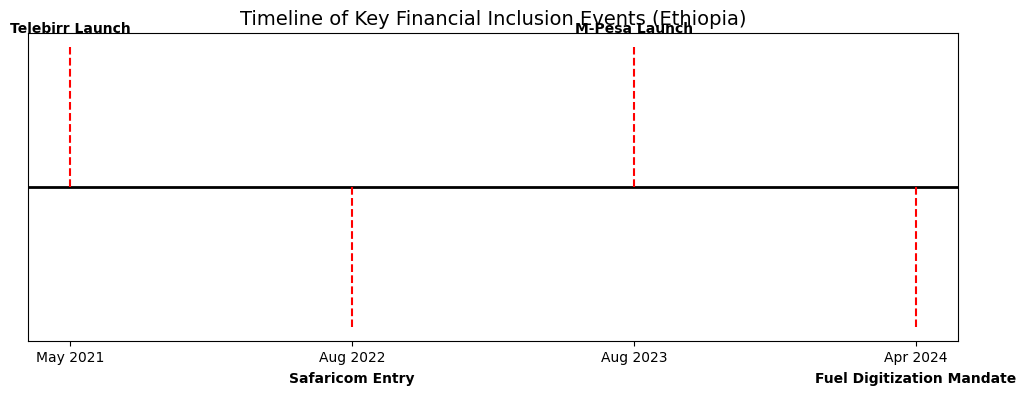

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the major events mentioned in your project
events = [
    ("May 2021", "Telebirr Launch"),
    ("Aug 2022", "Safaricom Entry"),
    ("Aug 2023", "M-Pesa Launch"),
    ("Apr 2024", "Fuel Digitization Mandate")
]

# Create the plot
plt.figure(figsize=(12, 4))
plt.axhline(0, color='black', linewidth=2) # The timeline line

# Add each event as a "stem"
for i, (date, label) in enumerate(events):
    plt.vlines(date, 0, 1 if i % 2 == 0 else -1, color='red', linestyle='--')
    plt.text(date, 1.1 if i % 2 == 0 else -1.4, label, ha='center', fontweight='bold')

plt.title("Timeline of Key Financial Inclusion Events (Ethiopia)", fontsize=14)
plt.yticks([]) # Hide the y-axis for a clean look
plt.show()

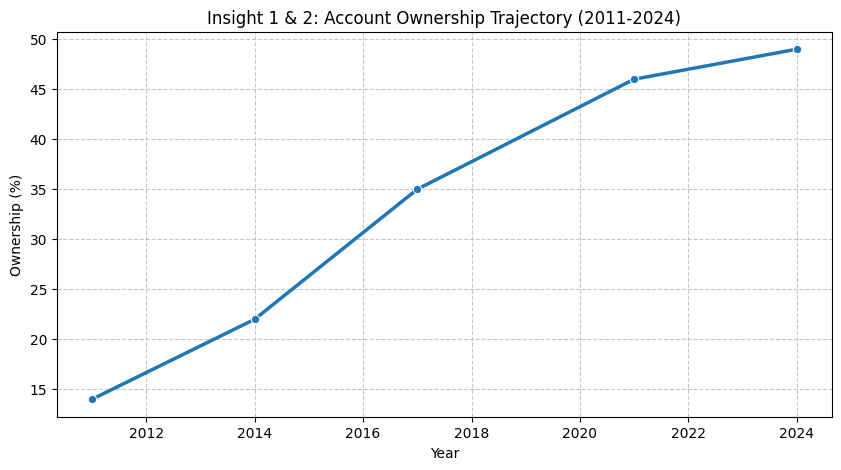

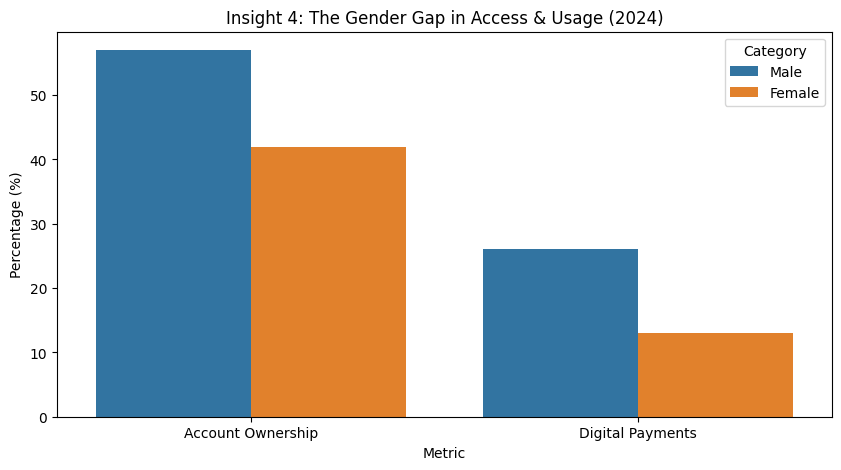

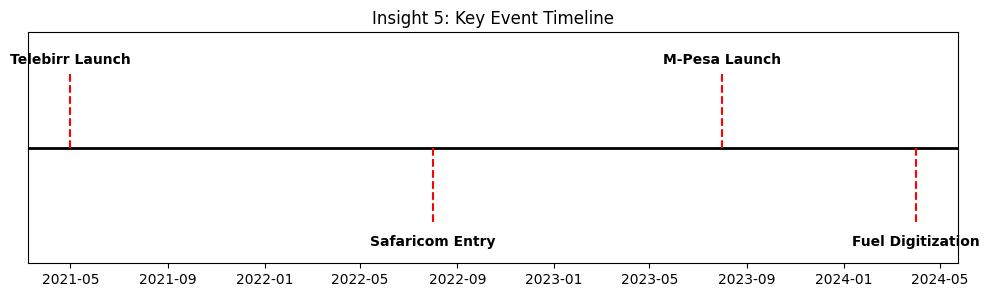

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Historical Account Ownership (The Trajectory)
years = [2011, 2014, 2017, 2021, 2024]
ownership = [14, 22, 35, 46, 49]
df_access = pd.DataFrame({'Year': years, 'Rate': ownership})

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_access, x='Year', y='Rate', marker='o', linewidth=2.5)
plt.title("Insight 1 & 2: Account Ownership Trajectory (2011-2024)")
plt.ylabel("Ownership (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Gender Gap Analysis (Grouped Bar Chart)
# Based on Findex 2024 findings for Ethiopia
gender_data = {
    'Category': ['Male', 'Female', 'Male', 'Female'],
    'Metric': ['Account Ownership', 'Account Ownership', 'Digital Payments', 'Digital Payments'],
    'Value': [57, 42, 26, 13] # Findex 2024 data
}
df_gender = pd.DataFrame(gender_data)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_gender, x='Metric', y='Value', hue='Category')
plt.title("Insight 4: The Gender Gap in Access & Usage (2024)")
plt.ylabel("Percentage (%)")
plt.show()

# 3. Event Timeline Visualization (RUBRIC REQUIREMENT)
events = [
    ('2021-05', 'Telebirr Launch'),
    ('2022-08', 'Safaricom Entry'),
    ('2023-08', 'M-Pesa Launch'),
    ('2024-04', 'Fuel Digitization')
]
dates = [pd.to_datetime(d) for d, l in events]
labels = [l for d, l in events]

fig, ax = plt.subplots(figsize=(12, 3))
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color="black", linewidth=2)
for i, (date, label) in enumerate(zip(dates, labels)):
    level = 1 if i % 2 == 0 else -1
    ax.vlines(date, 0, level, color="red", linestyle="--")
    ax.annotate(label, xy=(date, level), xytext=(0, 5 if level > 0 else -15),
                textcoords="offset points", ha='center', weight='bold')
plt.title("Insight 5: Key Event Timeline")
plt.yticks([])
plt.show()